#Steps Summary

In [0]:
# 1. Mount google drive
# 2. Import all modules and libraries
# 3. Set the directory path of google drive
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test



**1. Mount google drive**




In [1]:
from google.colab import drive
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# 2. Auto load the modified content
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




**2.   Import all required modules**




In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets,transforms

from torchsummary import summary

from tqdm import tqdm

import  matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.debugger import set_trace

import numpy as np
!pip install albumentations
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

     |████████████████████████████████| 634kB 4.9MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=d137c504e4be2ad4bce5723d1564a8c900e87d9ccac70afca0ff20bb2d741ceb
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-xgcpdltk
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-xgcpdltk
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64574 sha256=6fe971a1c1784d6b6b047575f984e8347f20031b4a0853fc49b86381bfac7577
  Stored in directory: /tmp/pip-ephem-wheel-cache-07poo1qz/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: album

**3. Set the modules homepath and library path**

In [4]:
import os,sys
os.chdir('/content/drive/My Drive/pytorch_Framework_suman')
homepath = os.getcwd()
print('\n### Home Path is : {}'.format(homepath))
!ls
sys.path.append(os.path.join(homepath,'lib'))
print(sys.path)


### Home Path is : /content/drive/My Drive/pytorch_Framework_suman
data						  outputs
EVA-4-S9-Suman-Kanukollu-LRFinder_CIFAR_10.ipynb  resnet18_cifar10_main.ipynb
EVA-4-S9-Suman-Kanukollu-Main.ipynb		  sampleImages
lib						  utils
models
['/tensorflow-1.15.0/python3.6', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/pytorch_Framework_suman/lib']


**4. Set Device**

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
print(torch.cuda.is_available())

cuda
True


**5. Import All reusable modules**

In [0]:
from models import resnet
from lib.loadDataSet import dataSetFunctions
from utils.showimgs import utils_showimgs

**6. Load transformations**

In [0]:
dsObj = dataSetFunctions()
transform_train, transform_test = dsObj.albumentationTransformations()

In [8]:
import albumentations as A
dir(A.Rotate)
#A.RGBShift

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_target_function',
 '_to_dict',
 'add_targets',
 'apply',
 'apply_to_bbox',
 'apply_to_bboxes',
 'apply_to_keypoint',
 'apply_to_keypoints',
 'apply_to_mask',
 'apply_to_masks',
 'apply_with_params',
 'call_backup',
 'get_base_init_args',
 'get_class_fullname',
 'get_dict_with_id',
 'get_params',
 'get_params_dependent_on_targets',
 'get_transform_init_args',
 'get_transform_init_args_names',
 'set_deterministic',
 'target_dependence',
 'targets',
 'targets_as_params',
 'update_params']

**7. Load dataset**

In [9]:
(trainset,testset)          = dsObj.dataSet(transform=(transform_train, transform_test),name='cifar10')
(train_loader,test_loader)  = dsObj.dataLoader(trainDataset=trainset,testDataset=testset)


### Preparing dataset for the name : cifar10
Files already downloaded and verified
Files already downloaded and verified

### Loading data from dataset


**8. Load classes**

In [10]:
dsObj.dataSetClasses(trainset)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

**9. Just get some random images from Train dataset and plot those**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


128
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
tensor([2, 0, 1, 6, 5, 5, 8, 2, 1, 6, 1, 9, 9, 6, 0, 1, 1, 2, 3, 0, 9, 9, 5, 6,
        3, 5, 8, 7, 9, 4, 8, 5, 7, 4, 9, 0, 5, 8, 3, 0, 9, 2, 6, 7, 4, 8, 5, 3,
        5, 4, 1, 8, 9, 2, 9, 2, 3, 9, 5, 9, 8, 9, 1, 0, 1, 9, 2, 6, 0, 6, 0, 0,
        3, 4, 0, 3, 9, 3, 8, 2, 1, 9, 0, 6, 5, 4, 9, 1, 5, 5, 3, 3, 5, 3, 9, 8,
        7, 3, 6, 0, 6, 2, 0, 5, 1, 6, 4, 0, 3, 9, 3, 8, 9, 0, 2, 9, 2, 6, 0, 5,
        1, 1, 9, 0, 1, 2, 7, 4])
      bird   airplane automobile       frog


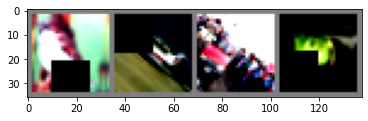

In [11]:
#from utils.showimgs import utils_showimgs
utObj = utils_showimgs()

utObj.getRandomTrainImgs(trainset,train_loader)

**10. Load Resnet18 model on to respective device (GPU or CPU) and print summary**

In [12]:
from models import resnet
print('Model is going to run on device : {}'.format(device))
model = resnet.ResNet18().to(device)
summary(model,(3,32,32))

Model is going to run on device : cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728


**11. Define loss function and optimizer**

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#net = model
#criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#optimizer = optim.Adam(model.parameters(), lr = 0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)'''

**11.1. LR Finder**

In [14]:
!pip install torch-lr-finder -v --global-option="amp"

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-oydhoo6k
Created temporary directory: /tmp/pip-req-tracker-5n6c3ikj
Created requirements tracker '/tmp/pip-req-tracker-5n6c3ikj'
Created temporary directory: /tmp/pip-install-kgxkalp3
1 location(s) to search for versions of torch-lr-finder:
* https://pypi.org/simple/torch-lr-finder/
Getting page https://pypi.org/simple/torch-lr-finder/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/torch-lr-finder/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/torch-lr-finder/ HTTP/1.1" 200 807
Updating cache with response from "https://pypi.org/simple/torch-lr-finder/"
Caching due t

**11.1.2. LR Finder**


*   *Increases the learning rate in an exponential manner and computes the training loss for each learning rate*



Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



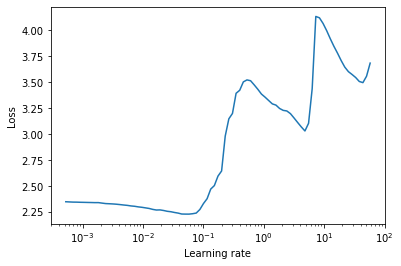

Min loss value is : 2.2281831089409105 
Min LR value is   : 0.0001318257


In [19]:
from torch_lr_finder import LRFinder

model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001,momentum=0.2)
#optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

print('Min loss value is : {} \nMin LR value is   : {}'.format(min(lr_finder.history['loss']),format(min(lr_finder.history['lr']),'.10f')))



In [59]:
print('Min loss observed at index : {}'.format(lr_finder.history['loss'].index(min(lr_finder.history['loss']))))
print('so corresponding LR value at that index is : {}'.format(lr_finder.history['lr'][lr_finder.history['loss'].index(min(lr_finder.history['loss']))]))

Min loss observed at index : 44
so corresponding LR value at that index is : 0.05754399373371571


**9.1.3. LR Finder**


*   *Increases the learning rate linearly and computes the evaluation loss for each learning rate.*



In [0]:
from torch_lr_finder import LRFinder

model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, val_loader=test_loader, end_lr=50, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

print('Min loss value is : {} \nMin LR value is   : {}'.format(min(lr_finder.history['loss']),min(lr_finder.history['lr'])))

In [0]:
lr_finder.plot(skip_end=0)
lr_finder.history

**12. Run Train and Test**

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.057544,momentum=0.2)

from lib import trainTestMethods
for epoch in range(5):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 0
 [================================================================>]  Step: 44ms | Tot: 29s680ms | Train >> Loss: 1.614 | Acc: 41.454% (20727/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s602ms | Test >> Loss: 1.706 | Acc: 43.560% (4356/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 47ms | Tot: 29s680ms | Train >> Loss: 1.212 | Acc: 56.476% (28238/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s645ms | Test >> Loss: 0.983 | Acc: 65.720% (6572/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 47ms | Tot: 29s885ms | Train >> Loss: 1.011 | Acc: 63.846% (31923/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s711ms | Test >> Loss: 1.037 | Acc: 64.970% (6497/10000) 79/79 

Epoch: 3
 [=========================

In [22]:
for epoch in range(5,10):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 5
 [================================================================>]  Step: 45ms | Tot: 29s982ms | Train >> Loss: 0.723 | Acc: 74.702% (37351/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s763ms | Test >> Loss: 0.663 | Acc: 78.410% (7841/10000) 79/79 

Epoch: 6
 [================================================================>]  Step: 44ms | Tot: 29s973ms | Train >> Loss: 0.667 | Acc: 76.580% (38290/50000) 391/391 
 [================================================================>]  Step: 12ms | Tot: 2s735ms | Test >> Loss: 0.681 | Acc: 77.310% (7731/10000) 79/79 

Epoch: 7
 [================================================================>]  Step: 44ms | Tot: 30s149ms | Train >> Loss: 0.613 | Acc: 78.486% (39243/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s684ms | Test >> Loss: 0.647 | Acc: 78.860% (7886/10000) 79/79 

Epoch: 8
 [=========================

In [23]:
for epoch in range(10,21):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 10
 [================================================================>]  Step: 46ms | Tot: 29s701ms | Train >> Loss: 0.507 | Acc: 82.254% (41127/50000) 391/391 
 [================================================================>]  Step: 8ms | Tot: 2s669ms | Test >> Loss: 0.529 | Acc: 82.860% (8286/10000) 79/79 

Epoch: 11
 [================================================================>]  Step: 46ms | Tot: 29s703ms | Train >> Loss: 0.474 | Acc: 83.404% (41702/50000) 391/391 
 [================================================================>]  Step: 9ms | Tot: 2s718ms | Test >> Loss: 0.555 | Acc: 82.480% (8248/10000) 79/79 

Epoch: 12
 [================================================================>]  Step: 46ms | Tot: 29s921ms | Train >> Loss: 0.453 | Acc: 84.318% (42159/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s744ms | Test >> Loss: 0.541 | Acc: 82.780% (8278/10000) 79/79 

Epoch: 13
 [=======================

In [24]:
for epoch in range(21,31):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 21
 [================================================================>]  Step: 44ms | Tot: 29s970ms | Train >> Loss: 0.321 | Acc: 88.902% (44451/50000) 391/391 
 [================================================================>]  Step: 9ms | Tot: 2s715ms | Test >> Loss: 0.512 | Acc: 85.190% (8519/10000) 79/79 

Epoch: 22
 [================================================================>]  Step: 44ms | Tot: 29s847ms | Train >> Loss: 0.301 | Acc: 89.476% (44738/50000) 391/391 
 [================================================================>]  Step: 8ms | Tot: 2s683ms | Test >> Loss: 0.525 | Acc: 85.510% (8551/10000) 79/79 

Epoch: 23
 [================================================================>]  Step: 44ms | Tot: 29s838ms | Train >> Loss: 0.299 | Acc: 89.676% (44838/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s734ms | Test >> Loss: 0.503 | Acc: 85.560% (8556/10000) 79/79 

Epoch: 24
 [=======================

In [25]:
for epoch in range(31,41):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 31
 [================================================================>]  Step: 46ms | Tot: 30s15ms | Train >> Loss: 0.242 | Acc: 91.710% (45855/50000) 391/391 
 [================================================================>]  Step: 9ms | Tot: 2s685ms | Test >> Loss: 0.465 | Acc: 87.120% (8712/10000) 79/79 

Epoch: 32
 [================================================================>]  Step: 44ms | Tot: 30s16ms | Train >> Loss: 0.235 | Acc: 91.720% (45860/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 2s689ms | Test >> Loss: 0.424 | Acc: 87.860% (8786/10000) 79/79 

Epoch: 33
 [================================================================>]  Step: 44ms | Tot: 29s861ms | Train >> Loss: 0.235 | Acc: 91.942% (45971/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s711ms | Test >> Loss: 0.568 | Acc: 85.520% (8552/10000) 79/79 

Epoch: 34
 [========================

In [26]:
for epoch in range(41,55):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 41
 [================================================================>]  Step: 45ms | Tot: 30s62ms | Train >> Loss: 0.191 | Acc: 93.448% (46724/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s795ms | Test >> Loss: 0.432 | Acc: 88.050% (8805/10000) 79/79 

Epoch: 42
 [================================================================>]  Step: 45ms | Tot: 30s147ms | Train >> Loss: 0.194 | Acc: 93.308% (46654/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s722ms | Test >> Loss: 0.407 | Acc: 88.980% (8898/10000) 79/79 

Epoch: 43
 [================================================================>]  Step: 44ms | Tot: 30s72ms | Train >> Loss: 0.189 | Acc: 93.330% (46665/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s701ms | Test >> Loss: 0.474 | Acc: 87.220% (8722/10000) 79/79 

Epoch: 44
 [=======================

**13. Grad-CAM**

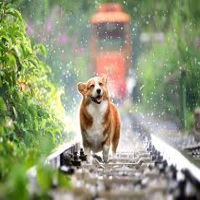

In [52]:
import os
sys.path.append(os.path.join(homepath,'sampleImages'))
imagename = 'dog4.jpg'
pil_img = utObj.loadImage(os.path.join(homepath,'sampleImages'), imagename)
pil_img.resize(size=(200,200))

In [0]:
from lib.gradCam.gradcam import GradCAM, GradCAMpp
from lib.gradCam.gradcam_utils import Normalize, visualize_cam

In [54]:
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [55]:
resnet = model
resnet.eval(), resnet.cuda();
model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(32, 32))
gradcam = GradCAM(model_dict, True)
gradcampp = GradCAMpp(model_dict)

saliency_map size : torch.Size([4, 4])


In [56]:
mask, _ = gradcam(normed_torch_img)
heatmap, result = visualize_cam(mask.cpu(), torch_img.cpu())

mask_pp, _ = gradcampp(normed_torch_img)
heatmap_pp, result_pp = visualize_cam(mask_pp.cpu(), torch_img.squeeze().cpu())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [0]:
from torchvision.utils import make_grid
imgs = []
imgs.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
imgs = make_grid(torch.cat(imgs, 0), nrow=5)

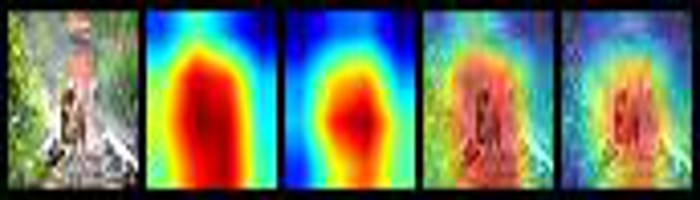

In [58]:
pilimg = utObj.saveimage(images = imgs, outputdirectory=os.path.join(homepath,'outputs'), imagename=imagename.split('.')[0]+'_gradCam.jpg')

pilimg.resize((700,200))